### Importazione librerie

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from datasets import load_dataset
import numpy
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


/home/cecchiara/Data-Mining-Cyclist-data/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load datasets

In [2]:
# Load the dataset
dataset_cyclists = load_dataset('csv', data_files='dataset/cyclists.csv')

# Convert to pandas DataFrames
df_cyclists = dataset_cyclists['train'].to_pandas()

In [3]:
# Display the first few rows of the cyclists dataset
df_cyclists.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


### Info cyclist dataset

In [4]:
# Cyclists dataset type columns
df_cyclists.dtypes

_url            object
name            object
birth_year     float64
weight         float64
height         float64
nationality     object
dtype: object

In [5]:
# Cyclists dataset info
df_cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


In [6]:
# Cyclists dataset statistic description (numerical columns)
df_cyclists.describe()

,birth_year,weight,height
count,6121.000000,3078.000000,3143.000000
mean,1974.071884,68.658739,179.815145
std,15.535834,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


In [7]:
# Cyclists dataset statistic description (categorical columns)
df_cyclists.describe(include='object')

,_url,name,nationality
count,6134,6134,6133
unique,6134,6127,72
top,bruno-surra,Jesús López,Italy
freq,1,2,1029


In [8]:
# Shape of the dataset
df_cyclists.shape

(6134, 6)

In [9]:
# Number of unique values in each column
df_cyclists.nunique()

_url           6134
name           6127
birth_year       71
weight           59
height           48
nationality      72
dtype: int64

In [10]:
# Number of values in each column
df_cyclists.count()

_url           6134
name           6134
birth_year     6121
weight         3078
height         3143
nationality    6133
dtype: int64

In [11]:
# for each categorical column, the number of times each unique value appears in the column
for col in df_cyclists.select_dtypes(include='object').columns:
    print(df_cyclists[col].value_counts())

_url
bruno-surra               1
rossano-brasi             1
camilo-andres-suarez      1
marco-gilli               1
nelson-rodriguez-serna    1
                         ..
claudio-fasolo            1
raul-rota-rus             1
marco-van-der-hulst       1
sandy-casar               1
ward-vanhoof              1
Name: count, Length: 6134, dtype: int64
name
Jesús  López           2
Roman  Kreuziger       2
Alberto  Fernández     2
Antonio  Cabello       2
Andrea  Peron          2
                      ..
Raúl  Rota             1
Marco Van Der Hulst    1
Sandy  Casar           1
Melchor  Mauri         1
Ward  Vanhoof          1
Name: count, Length: 6127, dtype: int64
nationality
Italy                 1029
Spain                  872
Belgium                869
France                 741
Netherlands            380
                      ... 
Dominican Republic       1
Liechtenstein            1
Zimbabwe                 1
Puerto Rico              1
Hongkong                 1
Name: count, Lengt

In [12]:
# Check for cyclists named Andrea Peron (for example) to see if there are any duplicates
df_cyclists[df_cyclists['name'] == 'Andrea  Peron']

,_url,name,birth_year,weight,height,nationality
347,andrea-peron-1,Andrea Peron,1971.0,70.0,183.0,Italy
2682,andrea-peron,Andrea Peron,1988.0,70.0,178.0,Italy


In [13]:
# for each numerical column, the number of times each unique value appears in the column
for col in df_cyclists.select_dtypes(include='number').columns:
    print(df_cyclists[col].value_counts())

birth_year
1964.0    145
1962.0    141
1970.0    140
1974.0    138
1975.0    133
         ... 
1937.0      4
1938.0      2
1934.0      2
1933.0      1
1936.0      1
Name: count, Length: 71, dtype: int64
weight
70.0    272
68.0    219
65.0    193
67.0    177
72.0    169
69.0    162
73.0    146
63.0    140
66.0    139
64.0    137
74.0    135
62.0    131
75.0    128
71.0    125
60.0     98
61.0     90
78.0     86
77.0     67
58.0     64
76.0     63
80.0     53
59.0     49
79.0     30
82.0     26
55.0     25
81.0     22
57.0     20
83.0     20
56.0     19
85.0     10
53.0      7
52.0      6
84.0      6
54.0      4
51.0      4
90.0      4
88.0      3
87.0      3
50.0      2
86.0      2
58.5      2
63.5      2
89.0      2
67.5      1
92.0      1
65.1      1
79.5      1
73.5      1
93.0      1
62.5      1
78.1      1
81.4      1
77.5      1
66.5      1
74.5      1
91.0      1
48.0      1
71.5      1
94.0      1
Name: count, dtype: int64
height
180.0    277
178.0    226
183.0    193
181.0    1

### Filter out duplicate records

In [14]:
# Extract duplicate rows
dups = df_cyclists.duplicated()

# Number of duplicate rows
dups.sum()


0

In [15]:
# Extract duplicate rows
dup_df = df_cyclists[df_cyclists.duplicated(keep=False)]

# Display duplicate rows
dup_df.head()

,_url,name,birth_year,weight,height,nationality


In [16]:
# Drop duplicate rows
df_cyclists = df_cyclists.drop_duplicates()

### Missing values

In [17]:
# Check for missing values
df_cyclists.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

In [18]:
# Extract rows with missing values
df_cyclists[df_cyclists.isnull().any(axis=1)]

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
6,willy-moonen,Willy Moonen,1947.0,NaN,NaN,Belgium
9,scott-davies,Scott Davies,NaN,NaN,NaN,None
10,stian-remme,Stian Remme,1982.0,NaN,NaN,Norway
13,evgueny-anachkine,Evgueny Anachkine,1970.0,NaN,NaN,Russia
...,...,...,...,...,...,...
6124,henri-vandenabeele,Henri Vandenabeele,2000.0,NaN,181.0,Belgium
6127,hendrik-van-dyck,Hendrik Van Dyck,1974.0,NaN,NaN,Belgium
6128,francisco-jose-pacheco,Francisco José Pacheco,1982.0,NaN,NaN,Spain
6129,juan-jose-martinez-diaz,Juan José Martínez,1966.0,NaN,NaN,Spain


In [19]:
# Show the record with missing value in birth_year
df_cyclists[df_cyclists['birth_year'].isnull()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,NaN,NaN,NaN,None
601,vladimir-malakov,Vladimir Malakov,NaN,NaN,NaN,Russia
894,antonio-zanini,Antonio Zanini,NaN,NaN,NaN,Italy
2408,filippo-simonetti,Filippo Simonetti,NaN,NaN,NaN,Italy
2515,carlos-garcia,Carlos García,NaN,NaN,NaN,Spain
2536,alexandr-osipov,Alexandr Osipov,NaN,NaN,NaN,Russia
3046,nicolai-kosyakov,Nicolai Kosyakov,NaN,NaN,NaN,Russia
3551,nevens-guy,Guy Nevens,NaN,NaN,NaN,Belgium
4142,oscar-pumar,Oscar Pumar,NaN,NaN,NaN,Venezuela
4384,javier-luquin,Javier Luquin,NaN,NaN,NaN,Spain


In [20]:
# show the record with missing values height
df_cyclists[df_cyclists['height'].isnull()]

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
6,willy-moonen,Willy Moonen,1947.0,NaN,NaN,Belgium
9,scott-davies,Scott Davies,NaN,NaN,NaN,None
10,stian-remme,Stian Remme,1982.0,NaN,NaN,Norway
13,evgueny-anachkine,Evgueny Anachkine,1970.0,NaN,NaN,Russia
...,...,...,...,...,...,...
6123,francisque-teyssier,Francisque Teyssier,1969.0,NaN,NaN,France
6127,hendrik-van-dyck,Hendrik Van Dyck,1974.0,NaN,NaN,Belgium
6128,francisco-jose-pacheco,Francisco José Pacheco,1982.0,NaN,NaN,Spain
6129,juan-jose-martinez-diaz,Juan José Martínez,1966.0,NaN,NaN,Spain


In [21]:
# show the record with missing values weight
df_cyclists[df_cyclists['weight'].isnull()]

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
6,willy-moonen,Willy Moonen,1947.0,NaN,NaN,Belgium
9,scott-davies,Scott Davies,NaN,NaN,NaN,None
10,stian-remme,Stian Remme,1982.0,NaN,NaN,Norway
13,evgueny-anachkine,Evgueny Anachkine,1970.0,NaN,NaN,Russia
...,...,...,...,...,...,...
6124,henri-vandenabeele,Henri Vandenabeele,2000.0,NaN,181.0,Belgium
6127,hendrik-van-dyck,Hendrik Van Dyck,1974.0,NaN,NaN,Belgium
6128,francisco-jose-pacheco,Francisco José Pacheco,1982.0,NaN,NaN,Spain
6129,juan-jose-martinez-diaz,Juan José Martínez,1966.0,NaN,NaN,Spain


In [22]:
# Show the record with missing value in nationality
df_cyclists[df_cyclists['nationality'].isna()]

,_url,name,birth_year,weight,height,nationality
9,scott-davies,Scott Davies,NaN,NaN,NaN,None


In [23]:
# Show the record with missing value both in height and weight
df_cyclists[(df_cyclists['height'].isnull()) & (df_cyclists['weight'].isnull())]

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
6,willy-moonen,Willy Moonen,1947.0,NaN,NaN,Belgium
9,scott-davies,Scott Davies,NaN,NaN,NaN,None
10,stian-remme,Stian Remme,1982.0,NaN,NaN,Norway
13,evgueny-anachkine,Evgueny Anachkine,1970.0,NaN,NaN,Russia
...,...,...,...,...,...,...
6123,francisque-teyssier,Francisque Teyssier,1969.0,NaN,NaN,France
6127,hendrik-van-dyck,Hendrik Van Dyck,1974.0,NaN,NaN,Belgium
6128,francisco-jose-pacheco,Francisco José Pacheco,1982.0,NaN,NaN,Spain
6129,juan-jose-martinez-diaz,Juan José Martínez,1966.0,NaN,NaN,Spain


In [24]:
# drop rows with missing values -> NON SO SE E' IL CASO forse solo per chi ha missing values in height e weight
#df_cyclists = df_cyclists.dropna(subset=['height', 'weight'])

# df_cyclists = df_cyclists.dropna()

### Imputations

In [25]:
# Sturges rule for approximately Normal distributions
def sturges_bin_count(df_cyclists):
    """Calculate optimal number of bins based on Sturges' rule"""
    return int(np.ceil(np.log2(len(df_cyclists)) + 1))
# Freedman-Diaconis Rule is better for data with outliers and skewed distributions
def freedman_diaconis_bin_count(data):
    """Calculate optimal number of bins based on Freedman-Diaconis rule"""
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * iqr * len(data) ** (-1/3)
    return int(np.ceil((data.max() - data.min()) / bin_width))

#bins_1 = sturges_bin_count(df_cyclists["birth_year"].dropna())
#bins_2 = freedman_diaconis_bin_count(df_cyclists["birth_year"].dropna())


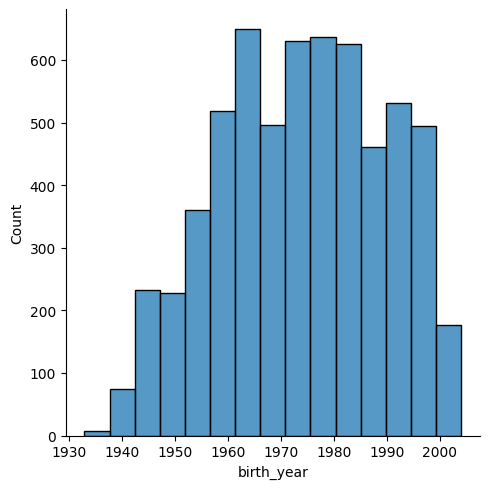

In [26]:
# Plot histogram of birth year
seaborn.displot(df_cyclists, 
                x="birth_year", 
                kind="hist",
                row_order="desc",
                bins=15)

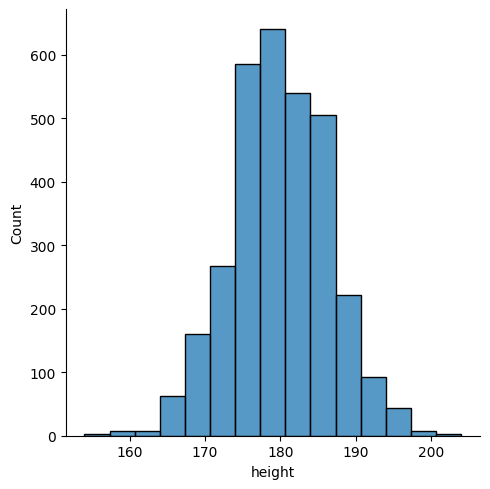

In [27]:
# Plot histogram of height
seaborn.displot(df_cyclists, 
                x="height", 
                kind="hist",
                row_order="desc",
                bins=15)

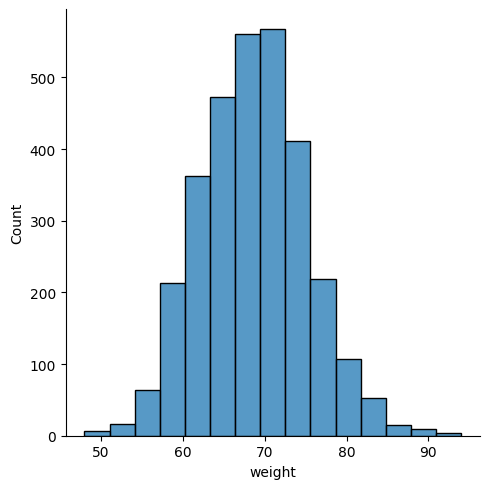

In [28]:
# Plot histogram of weight
seaborn.displot(df_cyclists, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=15)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71],
 [Text(0, 0, 'Italy'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Belgium'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Norway'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'Poland'),
  Text(9, 0, 'Germany'),
  Text(10, 0, 'Australia'),
  Text(11, 0, 'Switzerland'),
  Text(12, 0, 'Ireland'),
  Text(13, 0, 'Denmark'),
  Text(14, 0, 'Great Britain'),
  Text(15, 0, 'Colombia'),
  Text(16, 0, 'South Africa'),
  Text(17, 0, 'Argentina'),
  Text(18, 0, 'New Zealand'),
  Text(19, 0, 'Lithuania'),
  Text(20, 0, 'Portugal'),
  Text(21, 0

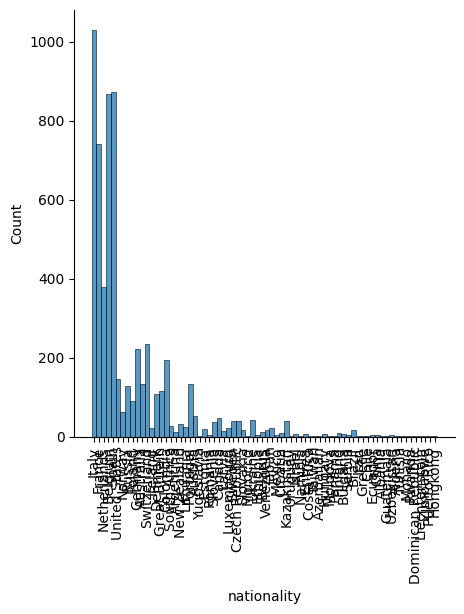

In [29]:
# Plot histogram of nationality
g = seaborn.displot(df_cyclists, 
                x="nationality", 
                kind="hist",
                row_order="desc",
                bins=len(df_cyclists['nationality'].unique()))
plt.xticks(rotation=90)

In [30]:
df_cyclists.isnull().sum() # check for missing values, sum them up by column

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

### Drop rows with missing values in the nationality column

In [31]:
df_cyclists = df_cyclists.dropna(subset=['nationality']) # drop rows with missing values in the nationality column

df_cyclists.isnull().sum() # check for missing values, sum them up by column

_url              0
name              0
birth_year       12
weight         3055
height         2990
nationality       0
dtype: int64

### Imputazione del peso in base all'altezza (e viceversa) - imputazione basata su gruppi

In [32]:
df_cyclists_filtered = df_cyclists.dropna(subset=["height", "weight"], how='all')

df_cyclists_filtered['height_group'] = pandas.cut(df_cyclists_filtered['height'], bins=5)

group_means = df_cyclists_filtered.groupby('height_group')['weight'].mean()

df_cyclists_filtered['weight'] = df_cyclists_filtered.apply(
    lambda row: group_means[row['height_group']] if pandas.isnull(row['weight']) else row['weight'],
    axis=1
)

df_cyclists.update(df_cyclists_filtered)


/tmp/ipykernel_1770/3203944533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cyclists_filtered['height_group'] = pandas.cut(df_cyclists_filtered['height'], bins=5)
/tmp/ipykernel_1770/3203944533.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df_cyclists_filtered.groupby('height_group')['weight'].mean()
/tmp/ipykernel_1770/3203944533.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [33]:
df_cyclists_filtered = df_cyclists.dropna(subset=["height", "weight"], how='all')
df_cyclists_filtered['weight_group'] = pandas.cut(df_cyclists_filtered['weight'], bins=5)

group_means = df_cyclists_filtered.groupby('weight_group')['height'].mean()

df_cyclists_filtered['height'] = df_cyclists_filtered.apply(
    lambda row: group_means[row['weight_group']] if pandas.isnull(row['height']) else row['height'],
    axis=1
)

df_cyclists.update(df_cyclists_filtered)

df_cyclists.isnull().sum()

/tmp/ipykernel_1770/665148862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cyclists_filtered['weight_group'] = pandas.cut(df_cyclists_filtered['weight'], bins=5)
/tmp/ipykernel_1770/665148862.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df_cyclists_filtered.groupby('weight_group')['height'].mean()
/tmp/ipykernel_1770/665148862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

_url              0
name              0
birth_year       12
weight         2983
height         2983
nationality       0
dtype: int64

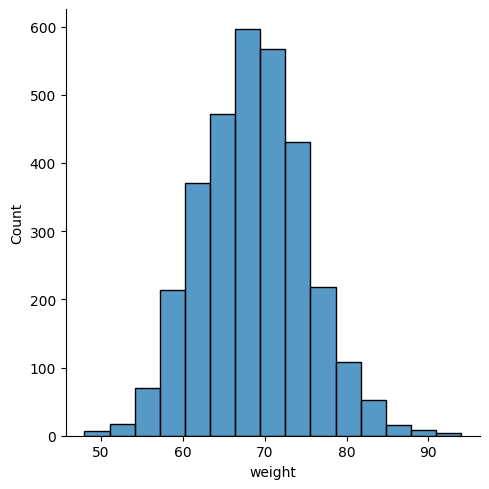

In [34]:
seaborn.displot(df_cyclists,
                x="weight",
                kind="hist",
                row_order="desc",
                bins=15)

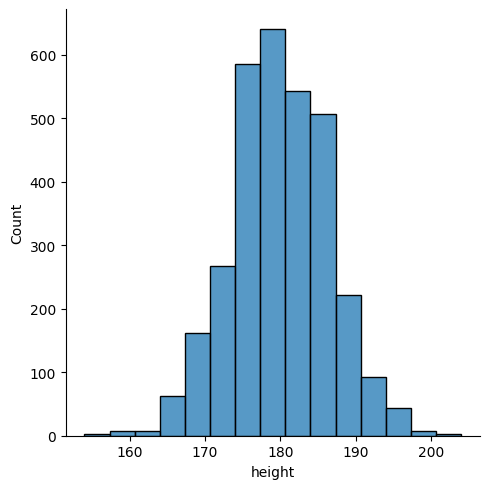

In [35]:
seaborn.displot(df_cyclists,
                x="height",
                kind="hist",
                row_order="desc",
                bins=15)

### Imputazione con valori casuali basati sulla distribuzione per i record con sia peso che altezza a NaN 

In [36]:
both_missing = df_cyclists[df_cyclists[['height', 'weight']].isna().all(axis=1)]

random_heights = np.random.choice(df_cyclists['height'].dropna(), size=len(both_missing))
random_weights = np.random.choice(df_cyclists['weight'].dropna(), size=len(both_missing))

df_cyclists.loc[both_missing.index, 'height'] = random_heights
df_cyclists.loc[both_missing.index, 'weight'] = random_weights

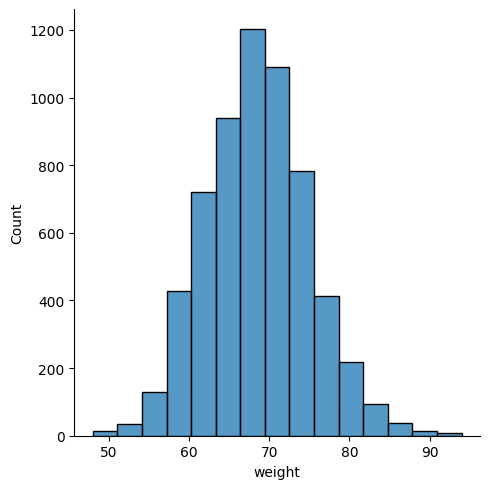

In [37]:
seaborn.displot(df_cyclists,
                x="weight",
                kind="hist",
                row_order="desc",
                bins=15)

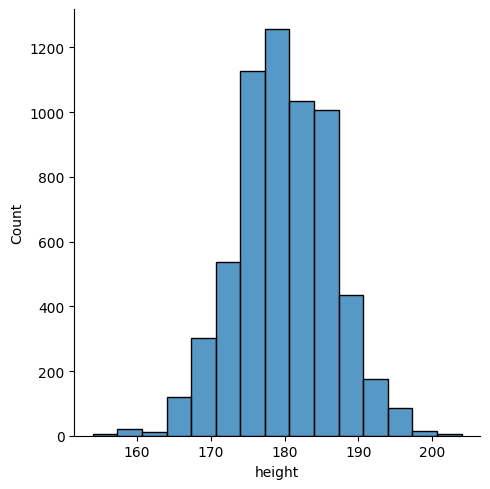

In [38]:
seaborn.displot(df_cyclists,
                x="height",
                kind="hist",
                row_order="desc",
                bins=15)

In [39]:
# Simple Imputations with mean for birth_year
imputer = SimpleImputer(strategy='mean')
df_cyclists['birth_year'] = imputer.fit_transform(df_cyclists[['birth_year']])

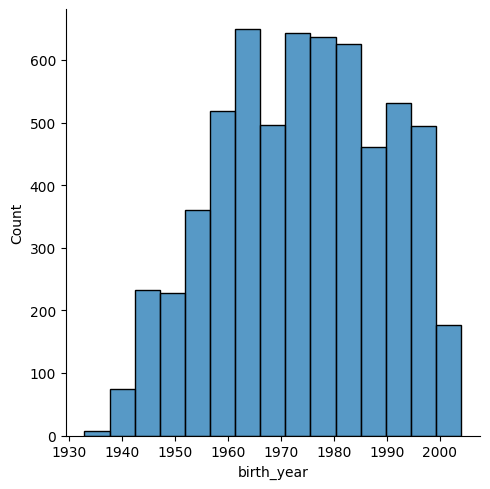

In [40]:
seaborn.displot(df_cyclists,
                x="birth_year",
                kind="hist",
                row_order="desc",
                bins=15)

In [41]:
df_cyclists.isnull().sum()

_url           0
name           0
birth_year     0
weight         0
height         0
nationality    0
dtype: int64

### KNN imputations varying K

In [42]:
# Load the dataset again (in df_cyclists imputations are already done, removing the one nationality missing value, birth_year simple imputation, height and weight group mean imputation)

dataset_cyclists_2 = load_dataset('csv', data_files='dataset/cyclists.csv')
df_cyclists_2 = dataset_cyclists_2['train'].to_pandas()

df_cyclists_2.isnull().sum()


_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

In [43]:
le = LabelEncoder()

df_cyclists_2['nationality'] = le.fit_transform(df_cyclists_2['nationality'].astype(str))

columns_for_imputation = ['height', 'weight', 'nationality', 'birth_year']
df_impute = df_cyclists_2[columns_for_imputation]


imputer = KNNImputer(n_neighbors=30)
df_imputed = imputer.fit_transform(df_impute)

df_cyclists_2['height'] = df_imputed[:, 0]
df_cyclists_2['weight'] = df_imputed[:, 1]
df_cyclists_2['nationality'] = df_imputed[:, 2]
df_cyclists_2['birth_year'] = df_imputed[:, 3]

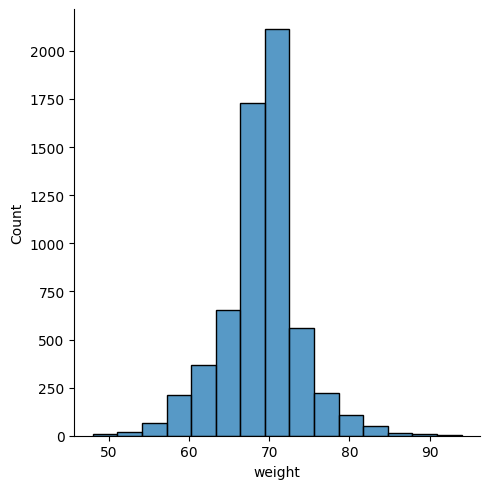

In [44]:
seaborn.displot(df_cyclists_2, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=15)

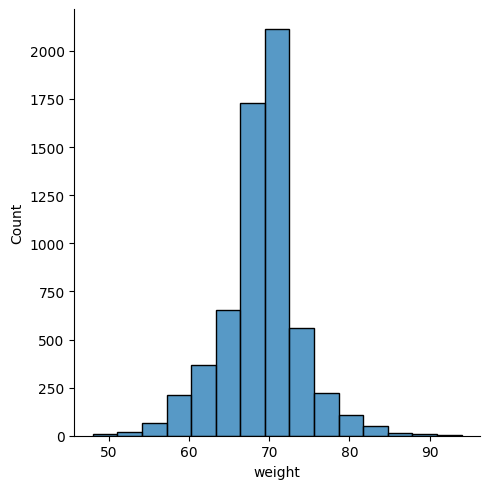

In [45]:
seaborn.displot(df_cyclists_2, 
                x="weight", 
                kind="hist",
                row_order="desc",
                bins=15)

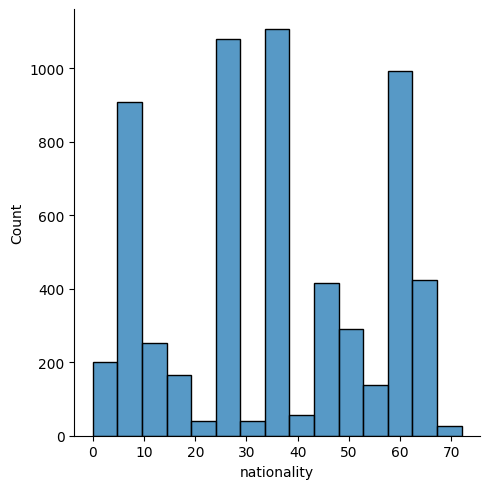

In [46]:
seaborn.displot(df_cyclists_2, 
                x="nationality", 
                kind="hist",
                row_order="desc",
                bins=15)

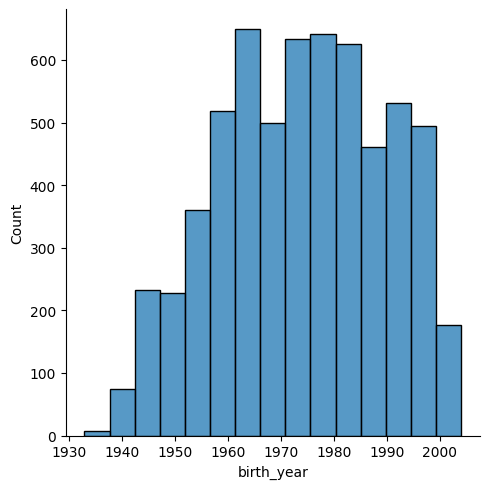

In [47]:
seaborn.displot(df_cyclists_2, 
                x="birth_year", 
                kind="hist",
                row_order="desc",
                bins=15)

In [48]:
df_cyclists_2.isnull().sum()

_url           0
name           0
birth_year     0
weight         0
height         0
nationality    0
dtype: int64

### Correlations and distributions

In [49]:
correlation, _ = pearsonr(df_cyclists['height'].dropna(), df_cyclists['weight'].dropna())
print(f'Correlazione tra altezza e peso: {correlation}')

Correlazione tra altezza e peso: 0.370086754405142


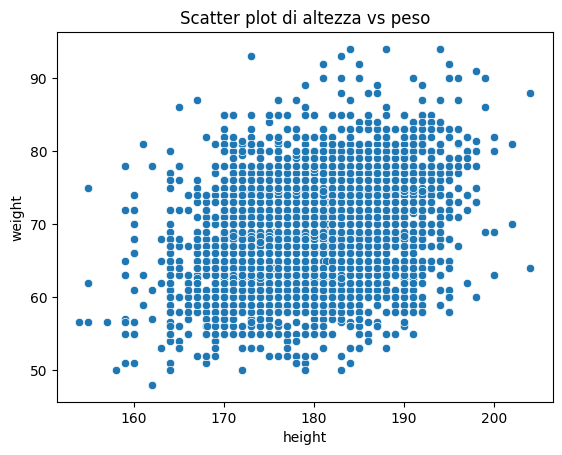

In [50]:
seaborn.scatterplot(x='height', y='weight', data=df_cyclists)
plt.title('Scatter plot di altezza vs peso')
plt.show()

In [51]:
from typing import Dict

import pandas


def correlations(dataset: pandas.DataFrame) -> pandas.DataFrame:
    correlations_dictionary = {
        correlation_type: dataset.corr(numeric_only=True, method=correlation_type)
        for correlation_type in ("kendall", "pearson", "spearman")
    }
    for i, k in enumerate(correlations_dictionary.keys()):
        correlations_dictionary[k].loc[:, "correlation_type"] = k
    correlations_matrix = pandas.concat(correlations_dictionary.values())

    return correlations_matrix

In [53]:
from typing import Tuple, Dict, Any

from sklearn.preprocessing import StandardScaler
import pandas


def __transform_single_features(dataset: pandas.DataFrame, transformation: str) -> Tuple[
    pandas.DataFrame, Dict[str, Any]]:
    match transformation:
        case "standard":
            transformed_dataset = dataset.copy().select_dtypes(exclude=["object", "category", "bool", "datetime64"])
            transformations = dict()

            for feature in transformed_dataset.columns:
                transformations[feature] = StandardScaler()
                transformed_feature = transformations[feature].fit_transform(transformed_dataset[[feature]]).squeeze()
                transformed_dataset = transformed_dataset.astype({feature: transformed_feature.dtype})
                transformed_dataset.loc[:, feature] = transformed_feature
        case _:
            raise ValueError(f"Unknown transformation: {transformation}")

    return transformed_dataset, transformations

def center_and_scale(dataset: pandas.DataFrame) -> Tuple[pandas.DataFrame, Dict[str, Any]]:
    """Shifts data to the origin: removes mean and scales by standard deviation all numeric features. Returns a copy of the dataset."""
    return __transform_single_features(dataset, "standard")


def drop_boolean(dataset: pandas.DataFrame) -> pandas.DataFrame:
    return dataset.select_dtypes(exclude="bool")

In [56]:
dataset_cyclits3 = load_dataset('csv', data_files='dataset/cyclists.csv')

df_cyclists_3 = dataset_cyclits3['train'].to_pandas()

normalized_dataset, normalization_scalers_dataset = center_and_scale(df_cyclists_3) # center and scale the dataset

correlations = correlations(normalized_dataset) # calculate the correlations between the columns
correlations # show the correlations

,birth_year,weight,height,correlation_type
birth_year,1.000000,-0.063740,0.094976,kendall
weight,-0.063740,1.000000,0.539760,kendall
height,0.094976,0.539760,1.000000,kendall
birth_year,1.000000,-0.104242,0.154252,pearson
weight,-0.104242,1.000000,0.720732,pearson
height,0.154252,0.720732,1.000000,pearson
birth_year,1.000000,-0.091220,0.137001,spearman
weight,-0.091220,1.000000,0.705189,spearman
height,0.137001,0.705189,1.000000,spearman


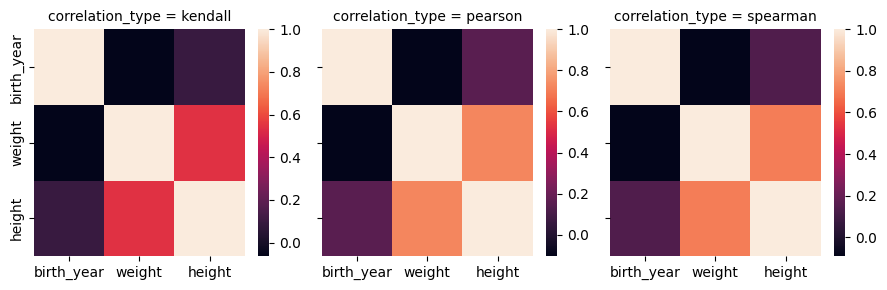

In [57]:
import seaborn

g = seaborn.FacetGrid(correlations, col="correlation_type")
g.map_dataframe(lambda data, color: seaborn.heatmap(data[data.columns[:-1]]))

<Axes: >

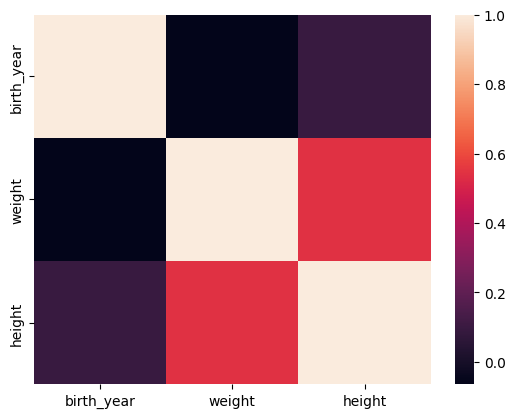

In [59]:
kendall_correlation = correlations.iloc[range(correlations.shape[1]-1), :].drop("correlation_type", axis="columns") # select only the kendall correlations
seaborn.heatmap(kendall_correlation) # plot the kendall correlations as a heatmap

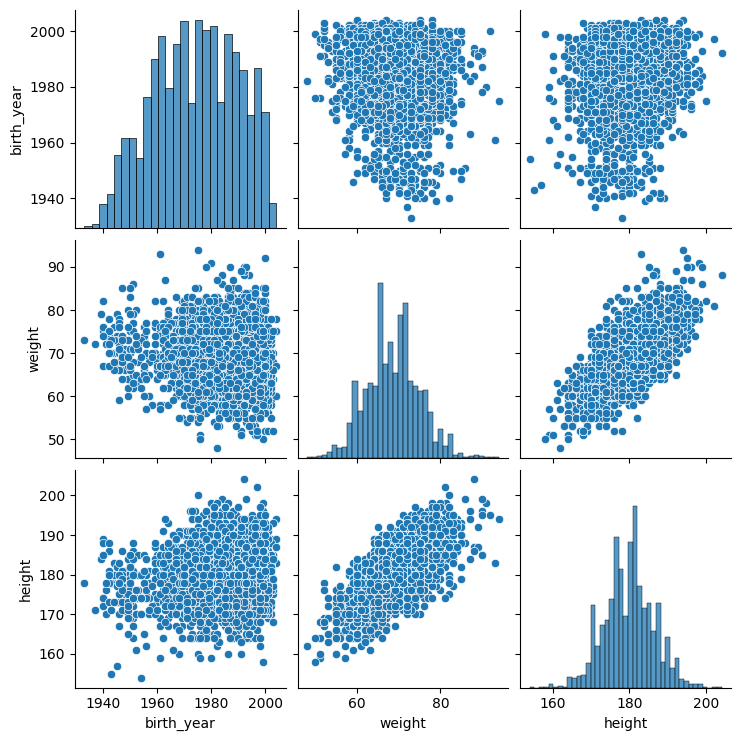

In [60]:
seaborn.pairplot(df_cyclists_3)

,birth_year,weight,height
0,-0.648353,NaN,NaN
1,-0.583981,0.841521,0.339136
2,1.411569,0.053766,1.425684
3,1.347197,1.471725,1.891347
4,1.475942,-2.151948,-1.368297


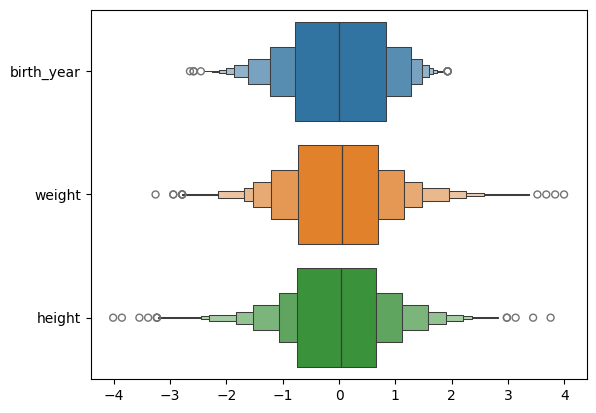

In [61]:
seaborn.boxenplot(normalized_dataset, orient="h") # create a boxen plot of the normalized dataset
normalized_dataset.head() 

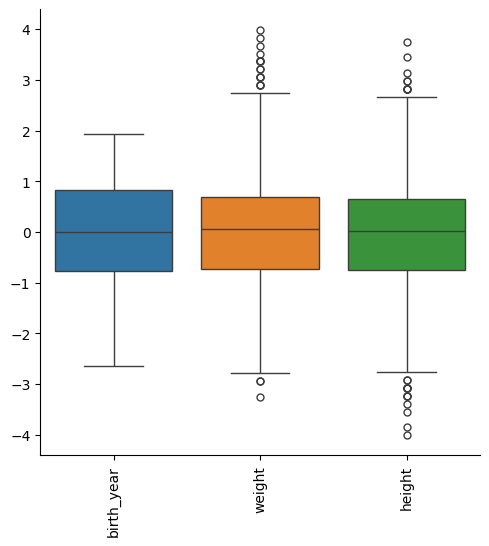

In [62]:
g = seaborn.catplot(normalized_dataset, kind="box") # create a box plot of the normalized dataset
g.set_xticklabels(rotation=90) # rotate the x-axis labels

### Crossing

In [64]:
from pandas import crosstab

crosstab(df_cyclists_3["height"], df_cyclists_3["weight"]) # create a crosstab between the height and weight columns  

weight,48.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,...,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0
height,,,,,,,,,,,,,,,,,,,,,
158.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159.0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
160.0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
161.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162.0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
163.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164.0,0,1,1,0,0,1,5,2,0,2,...,0,0,0,0,0,0,0,0,0,0
165.0,0,0,0,0,3,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
166.0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
